# DSCI 503 - Project 02

### Talaya Francois

In [1]:
import numpy as np
import math as mt
import matplotlib.pyplot as plt

## Part A: Stock Simulation Function
In this part of the project, I created a function that returns an array of simulated stock prices over time. The function accepts 4 parameters: start, rate, vol (short for volatility), and days. Using these values, we get the daily yield, cumulative yields, daily multipliers, and daily prices.From those variables, we calculate and return the array of simulated stocks.


In [2]:
def simulate_stock(start, rate, vol, days):
    rate = rate / 252
    vol = vol / (np.sqrt(252))
    daily_yields = np.random.normal(loc=rate, scale=vol, size=days)
    cumulative_yields = np.cumsum(daily_yields) # did I pass in the right variable?
    daily_multipliers = np.exp(cumulative_yields)
    daily_prices = np.round(daily_multipliers * start, 2)
    simulated_stocks = np.concatenate(([start], daily_prices))


    return simulated_stocks 
    


We will test the simulate_stock function below. 

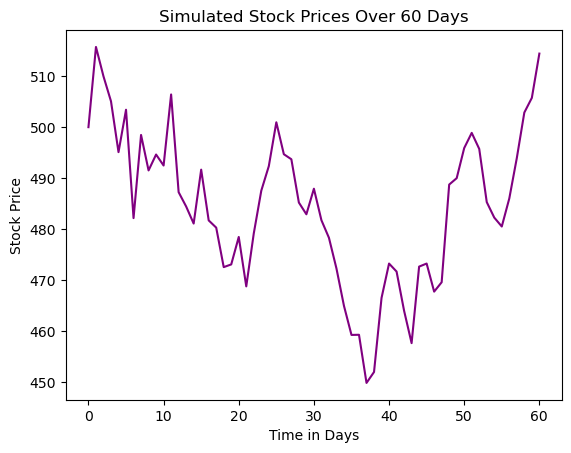

In [3]:
np.random.seed(1)
simulation = simulate_stock(start=500, rate=0.08, vol=0.3, days=60)

plt.plot(simulation, color="purple")
plt.xlabel("Time in Days")
plt.ylabel("Stock Price")
plt.title("Simulated Stock Prices Over 60 Days")
plt.show()


## Part B: Annual Yield Function 
This part of the project defines a function that calculates and returns the annual return rate of a stock. The annual return is rounded to 4 decimal places.

In [4]:
def find_yield(run):
    initial_price = run[0]
    final_price = run[-1]
    days = len(run) - 1

    annual_yield = (mt.log(final_price / initial_price) * 252) / days
    annual_yield = np.round(annual_yield, 4)
    return annual_yield

Now we will test the function on the simulated run from Part A.

In [5]:
test = find_yield(simulation)
print(test)

0.1196


In the next cell, we will show how the predicted outputs vary every time we call the function. We will run the simulation 25 times.

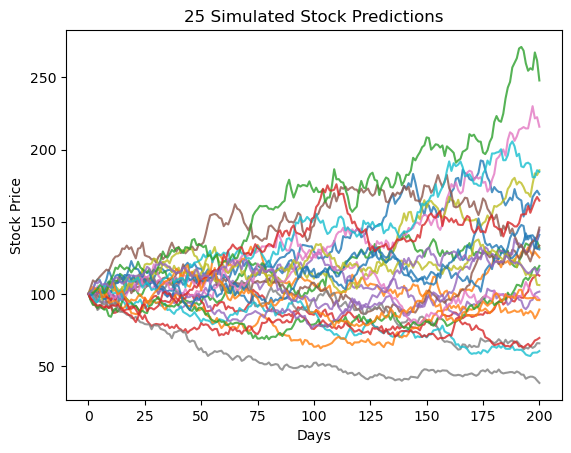

In [6]:
list_of_yields = []

for i in range(25): 
    simulated_stock = simulate_stock(start=100, rate=0.06, vol=0.4, days=200) # this needs to go inside the loop 
    ann_yield = find_yield(simulated_stock)
    list_of_yields.append(ann_yield)
    plt.plot(simulated_stock, alpha=0.8)
plt.xlabel("Days")
plt.ylabel("Stock Price")
plt.title("25 Simulated Stock Predictions")
plt.show()

The next cell will display the annual yields for the 25 simulated runs.

In [7]:
print(list_of_yields)

[0.6611, 0.2836, 0.3501, 0.1506, 0.0198, 0.3635, 0.9697, -0.5283, 0.7798, -0.6351, 0.4319, -0.1446, 0.2234, -0.4586, 0.4608, 0.4768, -0.0479, -1.2092, 0.0748, 0.7724, 0.3386, -0.0558, 1.1441, 0.6283, 0.1978]


## Part C: Finding Seeds that Generate Specific Outcomes

In this part of the project, we look at the effect of seed variance on stock prices. There are 3 stocks, Stock A, Stock B, and Stock C. Stock A has a seed value of 555, Stock B has a seed value of 333, and Stock C has a seed value of 444. Each of these seed values make their respective stock the highest in price at the end of the simulation.

In the cell below, Stock A has the highest simulated final price.

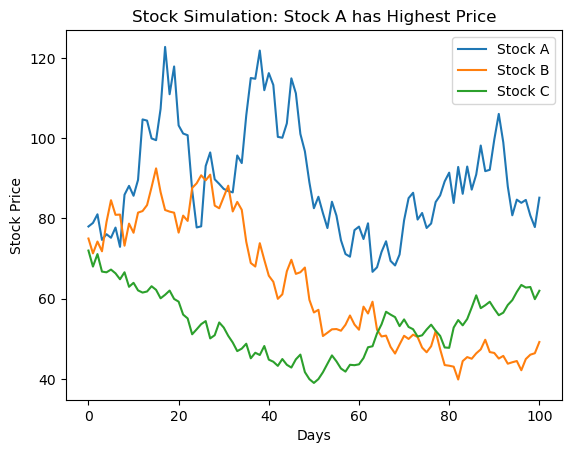

In [8]:
np.random.seed(555)

Stock_A = simulate_stock(start=78, rate=0.04, vol=1.2, days=100)
Stock_B = simulate_stock(start=75, rate=0.08, vol=0.8, days=100)
Stock_C = simulate_stock(start=72, rate=0.16, vol=0.6, days=100)

plt.plot(Stock_A, label="Stock A")
plt.plot(Stock_B, label="Stock B")
plt.plot(Stock_C, label="Stock C")

plt.legend()
plt.xlabel("Days")
plt.ylabel("Stock Price")
plt.title("Stock Simulation: Stock A has Highest Price")
plt.show()

In the cell below, Stock B has the highest simulated final price.

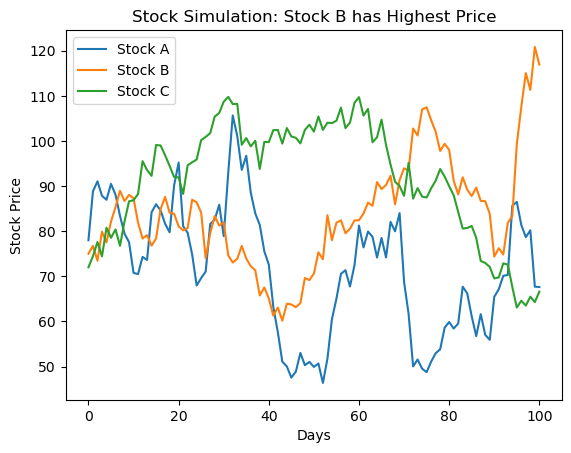

In [9]:
np.random.seed(333)

Stock_A = simulate_stock(start=78, rate=0.04, vol=1.2, days=100)
Stock_B = simulate_stock(start=75, rate=0.08, vol=0.8, days=100)
Stock_C = simulate_stock(start=72, rate=0.16, vol=0.6, days=100)

plt.plot(Stock_A, label="Stock A")
plt.plot(Stock_B, label="Stock B")
plt.plot(Stock_C, label="Stock C")

plt.legend()
plt.xlabel("Days")
plt.ylabel("Stock Price")
plt.title("Stock Simulation: Stock B has Highest Price")
plt.show()

In the cell below, Stock C has the highest simulated final price.

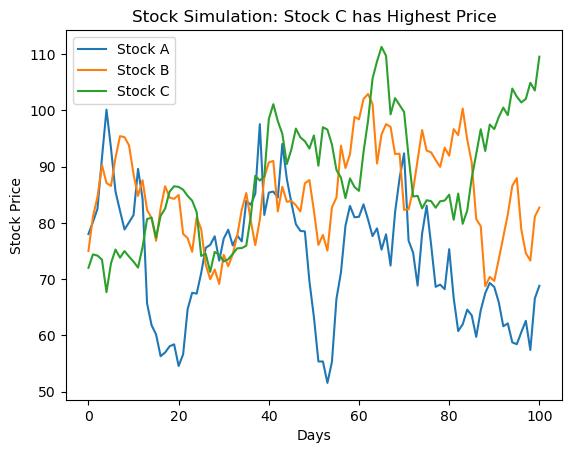

In [10]:
np.random.seed(444)

Stock_A = simulate_stock(start=78, rate=0.04, vol=1.2, days=100)
Stock_B = simulate_stock(start=75, rate=0.08, vol=0.8, days=100)
Stock_C = simulate_stock(start=72, rate=0.16, vol=0.6, days=100)

plt.plot(Stock_A, label="Stock A")
plt.plot(Stock_B, label="Stock B")
plt.plot(Stock_C, label="Stock C")

plt.legend()
plt.xlabel("Days")
plt.ylabel("Stock Price")
plt.title("Stock Simulation: Stock C has Highest Price")
plt.show()

## Part D: Monte Carlo Simulation
In this part of the project, I created a monte_carlo function. This function returns two arrays, a simulated prediction of final stock prices and an array of annual yields. Then, we use the monte_carlo function with a seed of 1 to run 10,000 simulations. These simulations are displayed in a histogram. 

In [11]:
def monte_carlo(start, rate, vol, days, num_runs):
    final_prices = []
    annual_yields = []
    for i in range(num_runs):
        simulated_prices = simulate_stock(start, rate, vol, days)
        final_price = simulated_prices[-1] 
        annual_yield = find_yield(simulated_prices) # pass in the list of simulated prices (the run)
        
        final_prices.append(final_price)
        annual_yields.append(annual_yield)
        
    final_prices = np.array(final_prices)
    annual_yields = np.array(annual_yields)
    return final_prices, annual_yields

Now we are about to test the function by running a Monte Carlo simulation with a 
specific seed. 

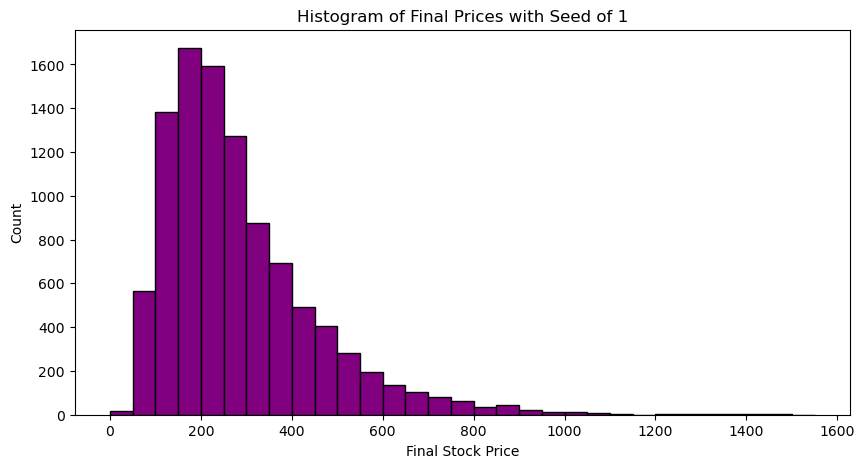

In [12]:
np.random.seed(1)
plt.figure(figsize=[10,5])

final_prices, annual_yields = monte_carlo(start=200, rate=0.1, vol=0.4, days=500, num_runs=10000) # unpack both returned arrays
plt.hist(final_prices, bins=np.arange(0, 1600, 50), edgecolor='k', color="purple", 
        )
plt.title('Histogram of Final Prices with Seed of 1')
plt.xlabel("Final Stock Price")
plt.ylabel("Count")
plt.show()

The next cell displays the 10th, 25th, 50th, 75th, and 90th percentiles of the simulated final prices.

In [13]:
print("10th percentile:", round(np.percentile(final_prices, 10), 2))
print("25th percentile:", round(np.percentile(final_prices, 25), 2))
print("50th percentile:", round(np.percentile(final_prices, 50), 2))
print("75th percentile:", round(np.percentile(final_prices, 75), 2))
print("90th percentile:", round(np.percentile(final_prices, 90), 2))


10th percentile: 118.05
25th percentile: 165.57
50th percentile: 242.95
75th percentile: 357.56
90th percentile: 505.91


## Part E: Effects of Volatility
In this section, we will explore the effects of volatility on stock price. Then, we will show the final prices on a histogram.

In [14]:
np.random.seed(1)
stock_a = monte_carlo(start=100, rate=0.12, vol=0.3, days=150, num_runs=10000)
stock_b = monte_carlo(start=100, rate=0.12, vol=0.7, days=150, num_runs=10000)

final_prices_a, annual_yields_a = stock_a 
final_prices_b, annual_yields_b = stock_b

AvAnnYld_A = np.round(np.mean(annual_yields_a), 4)
AvAnnYld_B = np.round(np.mean(annual_yields_b), 4)

print(f"Average Annual Yield for A over 10000 runs: {AvAnnYld_A}\nAverage Annual Yield for B over 10000 runs: {AvAnnYld_B}")

Average Annual Yield for A over 10000 runs: 0.1218
Average Annual Yield for B over 10000 runs: 0.1128


In the cell below, we will graph the two Monte Carlo simulations through a histogram of their final prices.

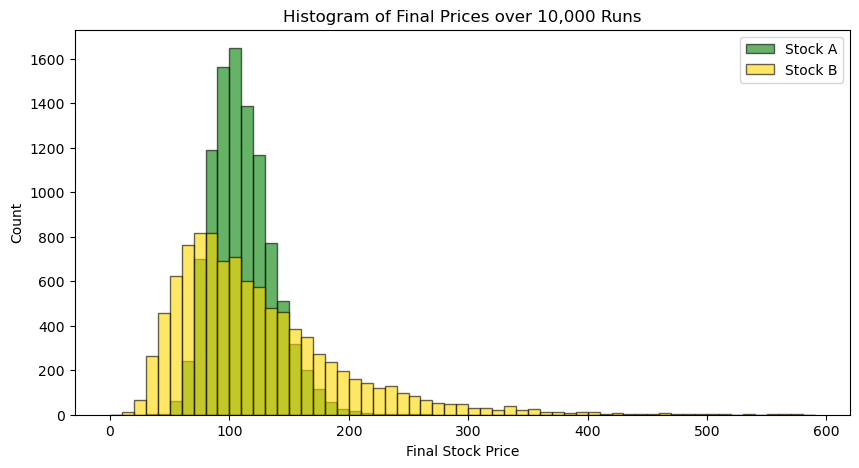

In [15]:
plt.figure(figsize=[10,5])

plt.hist(final_prices_a, bins=np.arange(0, 600, 10), edgecolor='k', color="green", alpha=0.6, label="Stock A" 
        )
plt.hist(final_prices_b, bins=np.arange(0, 600, 10), edgecolor='k', color="gold", alpha=0.6, label="Stock B"
        )
plt.title('Histogram of Final Prices over 10,000 Runs')
plt.xlabel("Final Stock Price")
plt.ylabel("Count")
plt.legend()
plt.show()

## Part F: Comparing Two Stocks
In this sectiion, we will compare two stocks with different rates and volatilities. Then we will find proportions in which (1) the final price for stock A is greater than stock B, (2) the final price for stock A is greater than 150 dollars, (3) the final price for stock B is greater than 150 dollars, (4) the final price of stock A is less than 100 dollars, and (5) the final price of stock B is less than 100 dollars.   

In [16]:
np.random.seed(1)
stock_A = monte_carlo(start=120, rate=0.8, vol=0.2, days=252, num_runs=10000)
stock_B = monte_carlo(start=120, rate=0.5, vol=0.5, days=252, num_runs=10000)

# unpack both stocks
FinPrcA, AnnYldA = stock_A
FinPrcB, AnnYldB = stock_B

# boolean masking to find the proportions
prp1 = np.mean(FinPrcA > FinPrcB)
prp2 = np.mean(FinPrcA > 150)
prp3 = np.mean(FinPrcB > 150)
prp4 = np.mean(FinPrcA < 100)
prp5 = np.mean(FinPrcB < 100)

print(f"""Proportions of runs in which... 
------------------------------- 
A ends above B:   {np.round(prp1, 4)} 
A ends above 150: {np.round(prp2, 4)} 
B ends above 150: {np.round(prp3, 4)} 
A ends below 100: {np.round(prp4, 4)} 
B ends below 100: {np.round(prp5, 4)}""")

Proportions of runs in which... 
------------------------------- 
A ends above B:   0.7122 
A ends above 150: 0.9986 
B ends above 150: 0.7105 
A ends below 100: 0.0 
B ends below 100: 0.0844


## Part G: Expected Call Payoff
In this section, we calculate the average call payoff of a stock. The strike price, or the price that the stock is being bet on, is subtracted from the final price of the stock. If there's any money left over, that is the call payoff. The cell below simulates the price trajectory for a stock 10,000 times and calculates the average call payoff.  

In [18]:
np.random.seed(1)
monte1 = monte_carlo(start=200, rate=0.11, vol=0.4, days=150, num_runs=10000)

finalprice, annualyield = monte1

difference = finalprice - 225  # array of values left after subtracting the starting price 
negative_num = difference < 0  # Find the negative values
call_payoff = np.where(negative_num, 0, difference) # if its not negative, replace it with the postive value_left

print(f"The average call payoff over 10,000 runs is: {np.mean(call_payoff)}") # instructions do not specify rounding 

The average call payoff over 10,000 runs is: 27.097683
